# Video inference

Loop on frames

Plot prob bargraph

Overlap text of class

Generate CAM video of heatmap overlayed

In [1]:
home_dir = '..\\'
baum_dir = home_dir + 'BAUM\\'


In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os, glob
import pandas as pd
import numpy as np

# TensorFlow session: grow memory when needed. TF, DO NOT USE ALL MY GPU MEMORY!!!
gpu_options = tf.GPUOptions(allow_growth=True)
config = tf.ConfigProto(log_device_placement=False, gpu_options=gpu_options)
isess = tf.InteractiveSession(config=config)

In [8]:

# load and evaluate a saved model
model_path = os.path.join(baum_dir, 'models', 'Model_fusion_11.h5')

model = load_model(model_path)
# summarize model.
#model.summary()
for i in range(len(model.layers)):
    if (i%2) == 1 and i < 21:
      model.layers[i]._name = model.layers[i].name +str("_2nd")

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
input_2_2nd (InputLayer)        [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 44, 44, 64)   4864        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5_2nd (Conv2D)           (None, 44, 44, 64)   4864        input_2_2nd[0][0]                
______________________________________________________________________________________________

['Annotations_BAUM1a.xlsx', 'Annotations_BAUM1s.xlsx', 'BAUM1a_MP4_all', 'BAUM1a_subtitles', 'BAUM1s_MP4 - All', 'BAUM1s_subtitles', 'data_6_classes_1a.csv', 'data_6_classes_1s.csv', 'imgs_flow', 'imgs_flow_1a', 'imgs_spatial', 'imgs_spatial_1a', 'models', 'readMe.docx', 'training_data_1a.csv', 'training_data_1s.csv', 'training_data_mixed.csv', 'validation_data_1a.csv', 'validation_data_1s.csv', 'validation_data_mixed.csv']


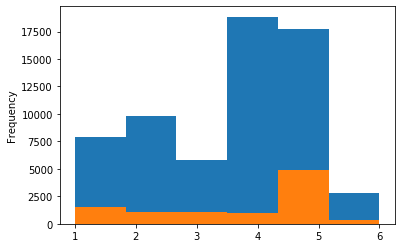

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
print(os.listdir(baum_dir))
# Used Data Hist. [1, 10, 11, 6, 7, 8]
tariningData = pd.read_csv(baum_dir + 'training_data_mixed.csv')
ax2 = tariningData['code'].plot.hist(bins=6)

validationData = pd.read_csv(baum_dir + 'validation_data_mixed.csv')
ax3 = validationData['code'].plot.hist(bins=6)

# Test on single Image

In [10]:
import cv2
import numpy as np
from glob import glob
from random import seed
from random import randint
import matplotlib.pyplot as plt

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

none_image = None

flow = baum_dir + 'imgs_flow\\'
spatial = baum_dir + 'imgs_spatial\\'

flowImgs = glob(flow+'*\\*\\*.png')
print("Taking random Image from ", len(flowImgs), "images")

def get_emotion_code(arr):
    emotions_code_arr = [1, 10, 11, 6, 7, 8]
    result_val = max(arr)
    result = list(arr).index(result_val)
    emotions_code = emotions_code_arr[result]
    return  emotions_code


val = randint(0, len(flowImgs))
img = flowImgs[val]
sample_name =img.split('\\')[-2]
for label in data_labels:
        if label[3] == sample_name:
            emotion = label[4]
            gt_code = label[5]
            break
#print("Ground truth for " ,sample_name , " is : ", emotion, gt_code )

flowImg = cv2.imread(img)
spatialImg = cv2.imread(img.replace('imgs_flow','imgs_spatial'))
if (not isinstance(flowImg, type(none_image))) and (not isinstance(spatialImg, type(none_image))):
    flowImg = cv2.resize(flowImg, (48,48))
    spatialImg = cv2.resize(spatialImg, (48,48))
    flowImg = cv2.cvtColor(flowImg, cv2.COLOR_BGR2RGB)
    spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
    flowImg = flowImg.reshape(-1, 48,48,3)
    spatialImg = spatialImg.reshape(-1, 48,48,3)

    out = model.predict([spatialImg, flowImg])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
emotions = ['Anger','Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']
ax.bar(emotions,out[0])
plt.show()


Taking random Image from  54410 images


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_5_1/Conv2D}}]]
	 [[dense_2_1/Softmax/_605]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_5_1/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

# Test on 100 rand Images

Taking 100 random Images from  60498 images
acuuracy is:  96.0 %


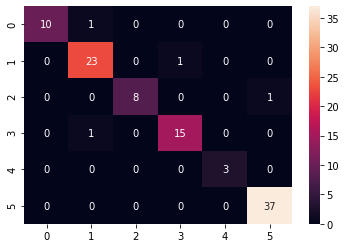

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
from glob import glob
from random import randint
import matplotlib.pyplot as plt

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

none_image = None

flow = baum_dir + 'imgs_flow\\'
spatial = baum_dir + 'imgs_spatial\\'

flowImgs = glob(flow+'*\\*\\*.png')
print("Taking 100 random Images from ", len(flowImgs), "images")

emotions_code_arr = [1, 10, 11, 6, 7, 8]
def get_emotion_code(arr):
    result_val = max(arr)
    result = list(arr).index(result_val)
    emotions_code = emotions_code_arr[result]
    return  emotions_code


good_prediction = 0
bad_prediction = 0
i = 0
outs = []
gt = []
while i < 100:
    val = randint(0, len(flowImgs))
    img = flowImgs[val]
    sample_name =img.split('/')[-2]
    for label in data_labels:
        if label[3] == sample_name:
            emotion = label[4]
            gt_code = label[5]
            break

    #print img 
    flowImg = cv2.imread(img)
    spatialImg = cv2.imread(img.replace('imgs_flow','imgs_spatial'))
    if (not isinstance(flowImg, type(none_image))) and (not isinstance(spatialImg, type(none_image))):
        i+=1
        flowImg = cv2.resize(flowImg, (48,48))
        spatialImg = cv2.resize(spatialImg, (48,48))
        flowImg = cv2.cvtColor(flowImg, cv2.COLOR_BGR2RGB)
        spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
        flowImg = flowImg.reshape(-1, 48,48,3)
        spatialImg = spatialImg.reshape(-1, 48,48,3)

        out = model.predict([spatialImg, flowImg])
        outs.append(out[0])
        gt.append(emotions_code_arr.index(gt_code))
        #print (out)

        emotions_code = get_emotion_code(out[0])
        if emotions_code == gt_code:
            good_prediction += 1
        else:
            bad_prediction += 1


print("acuuracy is: ", 100 *good_prediction/(good_prediction+bad_prediction), "%" )

y_predict = np.argmax(outs, axis=1)
cm = confusion_matrix(gt, y_predict)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

# Test on Video

In [0]:
# Needed Functions
# Create a face detec tion module 
calssifiers =['haarcascade_frontalface_default.xml',
              'haarcascade_frontalface_alt2.xml',
              'haarcascade_frontalcatface_extended.xml',
              'haarcascade_frontalcatface.xml',
              'haarcascade_frontalface_alt_tree.xml',
              'haarcascade_frontalface_alt.xml']

home_dir = '/content/drive/My Drive/Colab Notebooks/FER/'
baum_dir = home_dir + "BAUM/"
def detectFace(img):
    for classifier in calssifiers:
        face_cascade = cv2.CascadeClassifier(home_dir +'face_detectors/' + classifier)
        faces = face_cascade.detectMultiScale(img, 1.3, 1)
        if (len(faces) > 0):
            return faces
    faces = []
    return faces

# Test On Trained Classes

In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from google.colab.patches import cv2_imshow
from random import randint
#seed(2)

videos = glob(baum_dir+'BAUM1s_MP4 - All/*/*.mp4')
emotions = ['Anger', 'Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

#print (vid)
# Assert Video Code
val = randint(0, len(videos)-1)
val = 935
#print (len(videos))
vid = videos[val]
vidName = vid.split('/')[-1].split('.')[0]
vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])

while vidCode not in ([1, 10, 11, 6, 7, 8]):
  val = randint(0, len(videos))
  val = 935
  vid = videos[val]
  vidName = vid.split('/')[-1].split('.')[0]
  #print (vidName)
  try:
    vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
    vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])
  except:
    print ("Video Emotion Not Found")
print ('Video Name: {} Label: {}'.format(vidName, vidLabel))

cap = cv2.VideoCapture(vid)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

temp_image = np.array([])
none_image = None

noFacesCnt = 0
calcOpticalFlow = 0
for i in range(frameCount):
    print ('Frame: {}/{}'.format(i, frameCount))
    ret,frame = cap.read()
    if isinstance(frame, type(temp_image)) and not isinstance(frame, type(none_image)) :
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detectFace(frame_gray)
        if len(faces) == 0:
            calcOpticalFlow = 0
            noFacesCnt += 1
            continue

        (x,y,w,h)  = faces[0]
        frame_gray = frame_gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        if(frame_gray.shape[0] < 90 or roi_color.shape[0] < 90 ):
            calcOpticalFlow = 0
            continue

        #print(frame_gray.shape)
        frame_gray = cv2.resize(frame_gray, (100,100))
        roi_color = cv2.resize(roi_color, (100,100))
        #print(frame_gray.shape, "after")

        calcOpticalFlow += 1
        hsv = np.zeros_like(roi_color)
        hsv[...,1] = 255

        if (calcOpticalFlow > 1):
            flow = cv2.calcOpticalFlowFarneback(old_gray,frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)            
            mag, ang   = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
            
            flowImg = cv2.resize(rgb, (48,48))
            flowImg = flowImg.reshape(-1, 48,48,3)
            roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
            spatialImg = cv2.resize(roi_color, (48,48))
            spatialImg = spatialImg.reshape(-1, 48,48,3)
            out = model.predict([spatialImg, flowImg])
            print ('True: {}, Out: {}, Prob.: {}'.format(vidLabel, emotions[np.argmax(out[0])], out[0]))
            #print ('Emotion {}'.format(vidLabel))
            cv2_imshow(cv2.cvtColor(roi_color, cv2.COLOR_RGB2BGR))
            #cv2.waitKey(0)
        old_gray = frame_gray.copy()

Output hidden; open in https://colab.research.google.com to view.

# Test on UnSure Emotion Video

In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from google.colab.patches import cv2_imshow
from random import randint
from random import seed

seed(2)

videos = glob(baum_dir+'BAUM1s_MP4 - All/*/*.mp4')
emotions = ['Anger', 'Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

#print (vid)
# Assert Video Code
val = randint(0, len(videos)-1)
#print (len(videos))
vid = videos[val]
vidName = vid.split('/')[-1].split('.')[0]
vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])

print ('Video Name: {} Label: {}'.format(vidName, vidLabel))

cap = cv2.VideoCapture(vid)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

temp_image = np.array([])
none_image = None

noFacesCnt = 0
calcOpticalFlow = 0
for i in range(frameCount):
    print ('Frame: {}/{}'.format(i, frameCount))
    ret,frame = cap.read()
    if isinstance(frame, type(temp_image)) and not isinstance(frame, type(none_image)) :
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detectFace(frame_gray)
        if len(faces) == 0:
            calcOpticalFlow = 0
            noFacesCnt += 1
            continue

        (x,y,w,h)  = faces[0]
        frame_gray = frame_gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        if(frame_gray.shape[0] < 90 or roi_color.shape[0] < 90 ):
            calcOpticalFlow = 0
            continue

        #print(frame_gray.shape)
        frame_gray = cv2.resize(frame_gray, (100,100))
        roi_color = cv2.resize(roi_color, (100,100))
        #print(frame_gray.shape, "after")

        calcOpticalFlow += 1
        hsv = np.zeros_like(roi_color)
        hsv[...,1] = 255

        if (calcOpticalFlow > 1):
            flow = cv2.calcOpticalFlowFarneback(old_gray,frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)            
            mag, ang   = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
            
            flowImg = cv2.resize(rgb, (48,48))
            flowImg = flowImg.reshape(-1, 48,48,3)
            roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
            spatialImg = cv2.resize(roi_color, (48,48))
            spatialImg = spatialImg.reshape(-1, 48,48,3)
            out = model.predict([spatialImg, flowImg])
            print ('True: {}, Out: {}, Prob.: {}'.format(vidLabel, emotions[np.argmax(out[0])], out[0]))
            #print ('Emotion {}'.format(vidLabel))
            cv2_imshow(cv2.cvtColor(roi_color, cv2.COLOR_RGB2BGR))
            #cv2.waitKey(0)
        old_gray = frame_gray.copy()

Output hidden; open in https://colab.research.google.com to view.

# Visualizations

[[2.8924929e-04 9.9923384e-01 7.6923698e-06 1.2058595e-05 4.5242987e-04
  4.7390999e-06]]
(?,)
visualization layer is :  conv2d


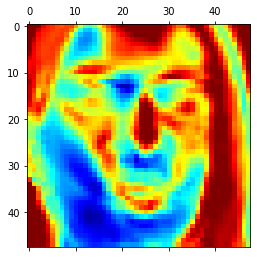

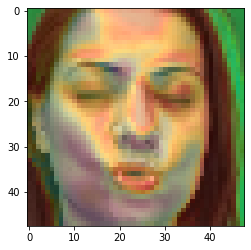

In [0]:
from tensorflow.keras import backend as K
import cv2
from keras.models import Model


def grad_CAM(model, layer, img, flowImg):
    x = np.expand_dims(img, 0)
    y = np.expand_dims(flowImg, 0)
    preds = model.predict([x, y])
    print(preds)
    idx = np.argmax(preds[0])
    
    # This is the index entry in the prediction vector
    output = model.output[:, idx]
    print(output.shape)

    last_conv_layer =model.layers[layer]
    print("visualization layer is : ", last_conv_layer.name)

    grads = tf.gradients(output, last_conv_layer.get_output_at(-1))[0]

    # This is a vector of shape (512,), where each entry
    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `block5_conv3`,
    # given a sample image
    #iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    iterate = K.function([model.input[0],model.input[1]], [pooled_grads, last_conv_layer.get_output_at(-1)[0]])

    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of two elephants
#    pooled_grads_value, conv_layer_output_value = iterate([x]) 
    pooled_grads_value, conv_layer_output_value = iterate([x, y])

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the elephant class
    for i in range(last_conv_layer.output_shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)   
    #heatmap_raw = heatmap  
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    
    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    # 0.4 here is a heatmap intensity factor
    #superimposed_img = heatmap * 0.1 + img
    opacity = 0.2
    
    superimposed_img = cv2.addWeighted(heatmap,opacity,img, 1-opacity, 0)
    return heatmap, superimposed_img #, heatmap_raw


val = randint(0, len(flowImgs))
img = flowImgs[val]

flowImg = cv2.imread(img)
spatialImg = cv2.imread(img.replace('imgs_flow','imgs_spatial'))
if (not isinstance(flowImg, type(none_image))) and (not isinstance(spatialImg, type(none_image))):
  flowImg = cv2.resize(flowImg, (48,48))
  spatialImg = cv2.resize(spatialImg, (48,48))
  flowImg = cv2.cvtColor(flowImg, cv2.COLOR_BGR2RGB)
  spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
  flowImg = flowImg.reshape(48,48,3)
  spatialImg = spatialImg.reshape(48,48,3)

#for layer in range(len(model.layers)):
#  last_conv_layer =model.layers[layer]
#  print("visualization layer is : ", last_conv_layer.name)

#Even numbers till 16 are the spatial Img Conv/pooling output
heatmap, superimposed_img = grad_CAM(model, 2, spatialImg, flowImg)
plt.matshow(heatmap)
plt.show()
plt.imshow(superimposed_img)


### **Process Video**

In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from google.colab.patches import cv2_imshow
from random import randint
from random import seed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from IPython import display
import os

#seed(2)
temp_image = np.array([])
none_image = None

videos = glob(baum_dir+'BAUM1s_MP4 - All/*/*.mp4')
emotions = ['Anger', 'Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

#print (vid)
# Assert Video Code
val = randint(0, len(videos)-1)
#print (len(videos))
vid = videos[val]
vidName = vid.split('/')[-1].split('.')[0]
vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])

while vidCode not in ([1, 10, 11, 6, 7, 8]):
  val = randint(0, len(videos))
  vid = videos[val]
  vidName = vid.split('/')[-1].split('.')[0]
  #print (vidName)
  try:
    vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
    vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])
  except:
    print ("Video Emotion Not Found")
print ('Video Name: {} Label: {}'.format(vidName, vidLabel))

video_output = baum_dir +'output.mp4'
cap = cv2.VideoCapture(vid)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_gray = cv2.resize(old_gray, (100,100))

clip = VideoFileClip(vid)

count_frames = 0
calcOpticalFlow = -1
def process_image_challenge(frame):
  global calcOpticalFlow, old_gray, count_frames
  count_frames += 1
  #if isinstance(frame, type(temp_image)) and not isinstance(frame, type(none_image)) :
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = detectFace(frame_gray)
  if len(faces) == 0:
      calcOpticalFlow = 0
      print("Old frame due to no faces")
      return frame #return original frame of video

  (x,y,w,h)  = faces[0]
  frame_gray = frame_gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]

  if(frame_gray.shape[0] < 90 or roi_color.shape[0] < 90 ):
      print("Old frame due to small size")
      calcOpticalFlow = 0
      return frame #return original frame of video

  frame_gray = cv2.resize(frame_gray, (100,100))
  roi_color = cv2.resize(roi_color, (100,100))

  calcOpticalFlow += 1
  hsv = np.zeros_like(roi_color)
  hsv[...,1] = 255

  if (calcOpticalFlow > 1 ):
    flow = cv2.calcOpticalFlowFarneback(old_gray,frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)            
    mag, ang   = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
    flowImg = cv2.resize(rgb, (48,48))
    flowImg = flowImg.reshape(-1, 48,48,3)
    roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
    spatialImg = cv2.resize(roi_color, (48,48))
    spatialImg = spatialImg.reshape(-1, 48,48,3)
    out = model.predict([spatialImg, flowImg])
    org = (50, 50)   
    # fontScale 
    fontScale = 1 
    font = cv2.FONT_HERSHEY_SIMPLEX      
    # Blue color in BGR 
    color = (255, 0, 0)   
    # Line thickness of 2 px 
    thickness = 2    
    # Using cv2.putText() method 
    txt = 'Ground Truth: {}, Out: {}'.format(vidLabel, emotions[np.argmax(out[0])])
    #print ('True: {}, Out: {}, Prob.: {}'.format(vidLabel, emotions[np.argmax(out[0])], out[0]))
    frame = cv2.putText(frame, txt, org, font,  
                      fontScale, color, thickness, cv2.LINE_AA) 
 
  old_gray = frame_gray.copy()
  return frame

challenge_clip = clip.fl_image(process_image_challenge)
%time challenge_clip.write_videofile(video_output, audio=False)
print(count_frames , frameCount)
print("The random index is ", val)


Video Name: S003_033 Label: Disgust
[MoviePy] >>>> Building video /content/drive/My Drive/Colab Notebooks/FER/BAUM/output.mp4
[MoviePy] Writing video /content/drive/My Drive/Colab Notebooks/FER/BAUM/output.mp4












  0%|          | 0/113 [00:00<?, ?it/s]









  1%|          | 1/113 [00:00<00:13,  8.29it/s]









  2%|▏         | 2/113 [00:00<00:13,  8.15it/s]









  3%|▎         | 3/113 [00:00<00:13,  7.98it/s]









  4%|▎         | 4/113 [00:00<00:13,  8.05it/s]









  4%|▍         | 5/113 [00:00<00:13,  8.09it/s]









  5%|▌         | 6/113 [00:00<00:13,  8.16it/s]









  6%|▌         | 7/113 [00:00<00:13,  8.09it/s]









  7%|▋         | 8/113 [00:01<00:13,  7.88it/s]









  8%|▊         | 9/113 [00:01<00:13,  8.00it/s]









  9%|▉         | 10/113 [00:01<00:13,  7.72it/s]









 10%|▉         | 11/113 [00:01<00:13,  7.84it/s]









 11%|█         | 12/113 [00:01<00:12,  7.85it/s]









 12%|█▏        | 13/113 [00:01<00:12,  7.94it/s]









 12%|█▏        | 14/113 [00:01<00:12,  7.94it/s]









 13%|█▎        | 15/113 [00:01<00:12,  7.94it/s]









 14%|█▍        | 16/113 [00:02<00:12,  7.94it/s]









 15%|█▌        | 17/11

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/Colab Notebooks/FER/BAUM/output.mp4 

CPU times: user 19.8 s, sys: 439 ms, total: 20.2 s
Wall time: 16 s
114 112
The random index is  935


### **Show Video Output**

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(video_output,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)